In [1]:
print("""
@File         : 02_how_to_use_talib.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2024-04-11 20:49:37
@Email        : cuixuanstephen@gmail.com
@Description  : how_to_use_talib
""")


@File         : 02_how_to_use_talib.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2024-04-11 20:49:37
@Email        : cuixuanstephen@gmail.com
@Description  : how_to_use_talib



In [2]:
%cd ../../

d:\DS_Works\Quantitative\ML4AT-2nd


In [3]:
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from talib import RSI, BBANDS, MACD

sns.set_style("whitegrid")
idx = pd.IndexSlice

In [4]:
DATA_STORE = "./data/assets.h5"

In [5]:
with pd.HDFStore(DATA_STORE) as store:
    data = (
        store["quandl/wiki/prices"]
        .loc[
            idx["2007":"2010", "AAPL"],
            ["adj_open", "adj_high", "adj_low", "adj_close", "adj_volume"],
        ]
        .unstack("ticker")
        .swaplevel(axis=1)
        .loc[:, "AAPL"]
        .rename(columns=lambda x: x.replace("adj_", ""))
    )

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2007-01-03 to 2010-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1008 non-null   float64
 1   high    1008 non-null   float64
 2   low     1008 non-null   float64
 3   close   1008 non-null   float64
 4   volume  1008 non-null   float64
dtypes: float64(5)
memory usage: 47.2 KB


## Compute Bollinger Bands

In [7]:
up, mid, low = BBANDS(data.close, timeperiod=21, nbdevup=2, nbdevdn=2, matype=0)

## Compute Relative Strength Index

In [8]:
rsi = RSI(data.close, timeperiod=14)

## Moving Average Convergence/Divergence

The MACD computes the difference between two Exponential Moving Averages (EMA), one longer- and one shorter-term.

The ta-lib MACD Indicator implementation has four inputs:
- the close price
- `fastperiod`: the short-term EMA period
- `slowperiod`: the long-term EMA period
- `signalperiod`: the period for the EMA of the MACD itself

It has three outputs:
- `macd` is the difference between the fast EMA and slow EMA.
- `macdsignal` is the EMA of the MACD value with period `signalperiod`
- `macdhist` computes the difference between `macd` and `macdsignal`

In [9]:
macd, macdsignal, macdhist = MACD(
    data.close, fastperiod=12, slowperiod=26, signalperiod=9
)

In [10]:
macd_data = pd.DataFrame(
    {
        "AAPL": data.close,
        "MACD": macd,
        "MACD Signal": macdsignal,
        "MACD History": macdhist,
    }
)

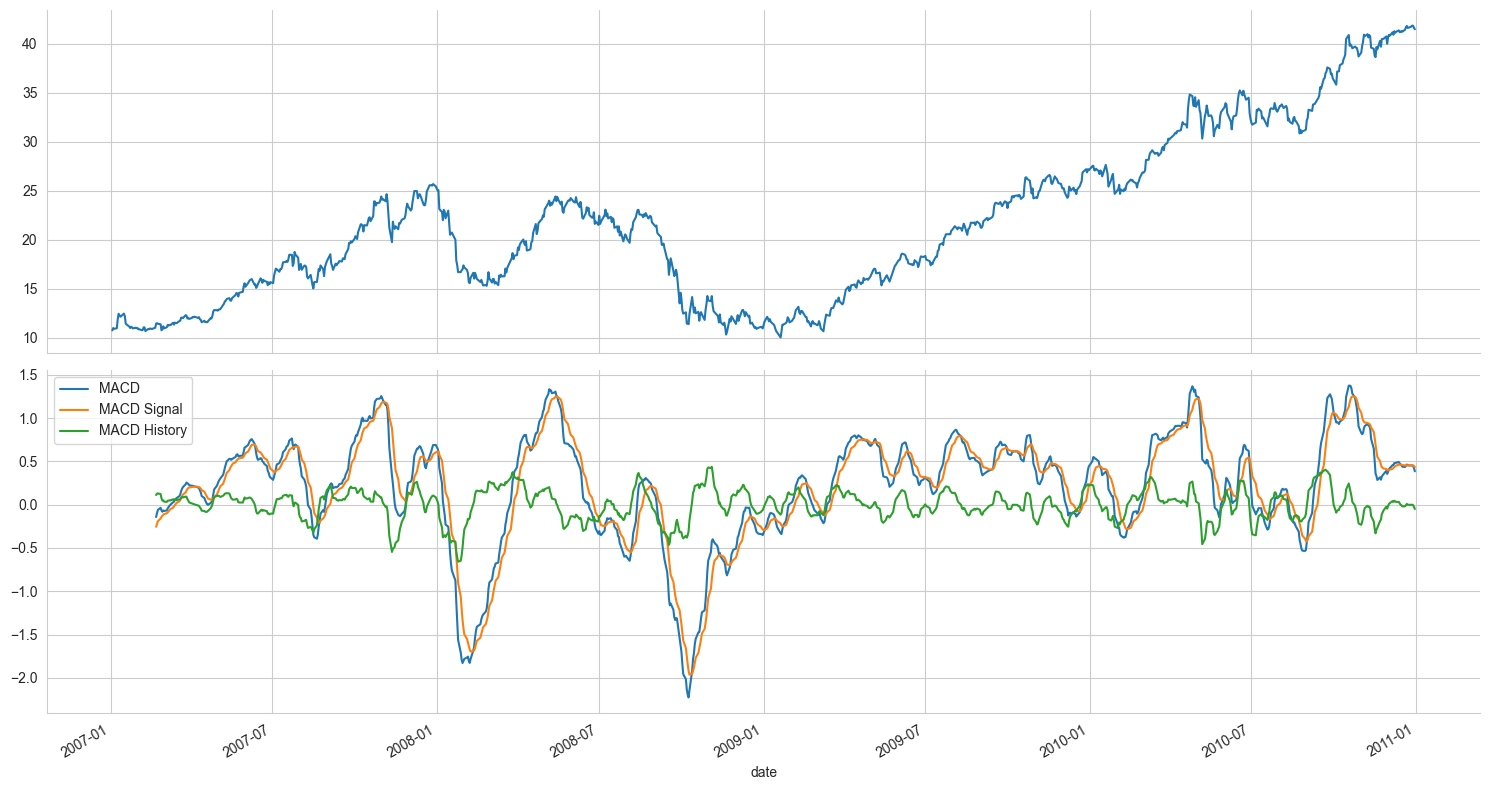

In [11]:
fig, axes = plt.subplots(nrows=2, figsize=(15, 8), sharex=True)
macd_data.AAPL.plot(ax=axes[0])
macd_data.drop("AAPL", axis=1).plot(ax=axes[1])
fig.tight_layout()
sns.despine()

## Plot Result

In [12]:
data = pd.DataFrame(
    {
        "AAPL": data.close,
        "BB Up": up,
        "BB Mid": mid,
        "BB Down": low,
        "RSI": rsi,
        "MACD": macd,
    }
)

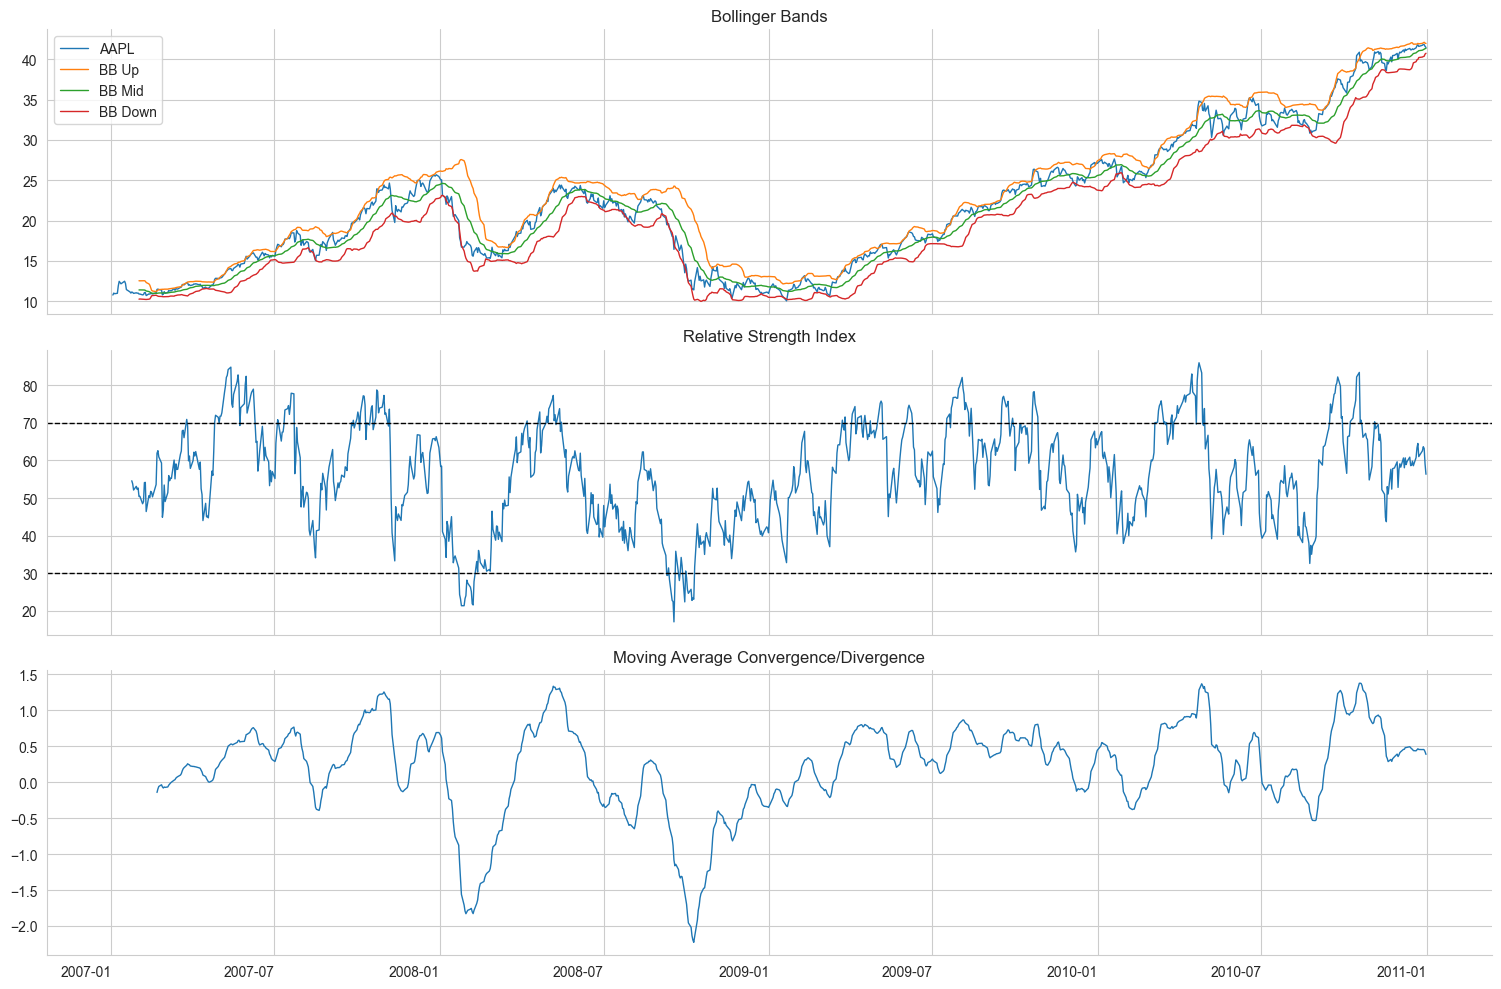

In [14]:
fig, axes = plt.subplots(nrows=3, figsize=(15, 10), sharex=True)
data.drop(["RSI", "MACD"], axis=1).plot(ax=axes[0], lw=1, title="Bollinger Bands")
data["RSI"].plot(ax=axes[1], lw=1, title="Relative Strength Index")
axes[1].axhline(70, lw=1, ls="--", c="k")
axes[1].axhline(30, lw=1, ls="--", c="k")
data.MACD.plot(ax=axes[2], lw=1, title="Moving Average Convergence/Divergence", rot=0)
axes[2].set_xlabel("")
fig.tight_layout()
sns.despine()